In [ ]:
#Import some packages to use
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#To see our directory
import os
import random
import gc   #Gabage collector for cleaning deleted data from memory

In [ ]:
import os

# Set Kaggle API credentials
os.environ['KAGGLE_USERNAME'] = 'yenchenhsu'
os.environ['KAGGLE_KEY'] = '2654121bcbde9a8d683d47def584db39'

# Use the Kaggle API to download the dataset
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 98% 801M/814M [00:07<00:00, 151MB/s]
100% 814M/814M [00:07<00:00, 111MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('dogs-vs-cats-redux-kernels-edition.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

In [ ]:
import os

dataset_dir = 'dataset'
contents = os.listdir(dataset_dir)
print(contents)

['train.zip', 'sample_submission.csv', 'test.zip']


In [ ]:
! unzip dataset/train.zip
! unzip dataset/test.zip

In [ ]:
# create destination directories for cats and dogs
!mkdir dataset/cat_images
!mkdir dataset/dog_images

# move cat images to the cat_images directory
!mv train/cat.*.jpg dataset/cat_images/

# move dog images to the dog_images directory
!mv train/dog.*.jpg dataset/dog_images/

In [ ]:
! ls dataset/cat_images | head -n 10

cat.0.jpg
cat.10000.jpg
cat.10001.jpg
cat.10002.jpg
cat.10003.jpg
cat.10004.jpg
cat.10005.jpg
cat.10006.jpg
cat.10007.jpg
cat.10008.jpg


In [ ]:
! ls dataset/dog_images/ | head -n 10

dog.0.jpg
dog.10000.jpg
dog.10001.jpg
dog.10002.jpg
dog.10003.jpg
dog.10004.jpg
dog.10005.jpg
dog.10006.jpg
dog.10007.jpg
dog.10008.jpg


In [ ]:
import os
import random
import shutil

# Define the paths to your cat and dog image directories
cat_images_dir = 'dataset/cat_images'
dog_images_dir = 'dataset/dog_images'

# Define the paths where you want to save the sampled data
sampled_cat_images_dir = 'dataset/sample_cat_images'
sampled_dog_images_dir = 'dataset/sample_dog_images'

# Define the number of samples you want from each category
num_samples_per_category = 10000

# Create the directories for sampled cat and dog images
os.makedirs(sampled_cat_images_dir, exist_ok=True)
os.makedirs(sampled_dog_images_dir, exist_ok=True)

# Randomly sample cat images
cat_files = os.listdir(cat_images_dir)
random.shuffle(cat_files)
sampled_cat_files = cat_files[:num_samples_per_category]

# Randomly sample dog images
dog_files = os.listdir(dog_images_dir)
random.shuffle(dog_files)
sampled_dog_files = dog_files[:num_samples_per_category]

# Copy the sampled cat images to the sample_cat_images directory
for filename in sampled_cat_files:
    src_path = os.path.join(cat_images_dir, filename)
    dest_path = os.path.join(sampled_cat_images_dir, filename)
    shutil.copy(src_path, dest_path)

# Copy the sampled dog images to the sample_dog_images directory
for filename in sampled_dog_files:
    src_path = os.path.join(dog_images_dir, filename)
    dest_path = os.path.join(sampled_dog_images_dir, filename)
    shutil.copy(src_path, dest_path)

In [ ]:
# Define the paths to the sampled cat and dog image directories
sampled_cat_images_dir = 'dataset/sample_cat_images'
sampled_dog_images_dir = 'dataset/sample_dog_images'

# List the files in the sampled_cat_images_dir directory
num_cat_files = len(os.listdir(sampled_cat_images_dir))
print(f"Number of Sampled Cat Images: {num_cat_files}")
num_dog_files = len(os.listdir(sampled_dog_images_dir))
print(f"Number of Sampled Dog Images: {num_dog_files}")

Number of Sampled Cat Images: 10000
Number of Sampled Dog Images: 10000


In [ ]:
del cat_files
del dog_files
gc.collect()   #collect garbage to save memory

4

In [ ]:
# Get the list of image file paths from each directory
cat_image_paths = [os.path.join(sampled_cat_images_dir, filename) for filename in os.listdir(sampled_cat_images_dir)]
dog_image_paths = [os.path.join(sampled_dog_images_dir, filename) for filename in os.listdir(sampled_dog_images_dir)]

# Combine the two lists into a single list
train_imgs = cat_image_paths + dog_image_paths

In [ ]:
#shuffle the training images
random.shuffle(train_imgs)

In [ ]:
#Lets declare our image dimensions
#we are using coloured images.
nrows = 128
ncolumns = 128
channels = 3

#A function to read and process the images to an acceptable format for our model
def read_and_process_image(list_of_images):
    X = [] # images
    y = [] # labels

    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))
        #get the labels
        if 'dog' in image:
            y.append(0)
        elif 'cat' in image:
            y.append(1)

    return X, y

In [ ]:
X, y = read_and_process_image(train_imgs)

In [ ]:
unique, counts = np.unique(y, return_counts=True)
for label, count in zip(unique, counts):
    print("Label:", label, "Count:", count)

Label: 0 Count: 10000
Label: 1 Count: 10000


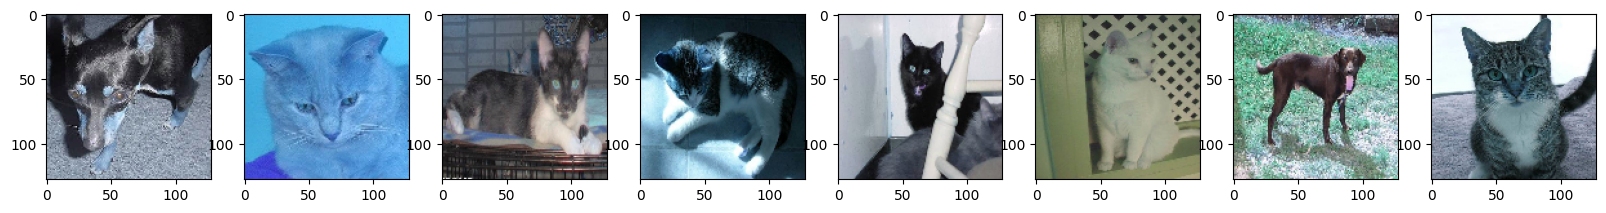

In [ ]:
#Lets view some of the pics
plt.figure(figsize=(20,10))
columns = 8
for i in range(columns):
    plt.subplot(5 // columns + 1, columns, i + 1)
    plt.imshow(X[i])

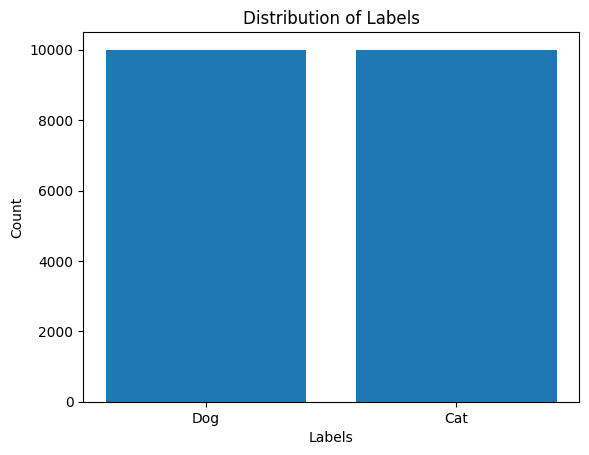

In [ ]:
import matplotlib.pyplot as plt

labels, counts = np.unique(y, return_counts=True)

# Plotting
plt.bar(labels, counts, tick_label=['Dog', 'Cat'])
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from keras.layers import Dropout
from keras import optimizers
from tensorflow import keras
from tensorflow.keras.applications import ResNet50V2

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
print("Shape of train images is:", X_train.shape)
print("Shape of validation images is:", X_val.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_val.shape)

Shape of train images is: (16000, 128, 128, 3)
Shape of validation images is: (4000, 128, 128, 3)
Shape of labels is: (16000,)
Shape of labels is: (4000,)


In [ ]:
#clear memory
del X
del y
gc.collect()

43

In [ ]:
ntrain = len(X_train)
nval = len(X_val)
batch_size = 32

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Model
from tensorflow.keras.applications import Xception


from tensorflow.keras import layers, models

Xception = Xception(include_top=False, weights='imagenet', input_shape=(128,128,3))
for layer in Xception.layers:
    layer.trainable = False

# build the complete model
model_res = Xception.output
model_res = layers.GlobalAveragePooling2D()(model_res)
model_res = layers.Dense(32, activation='relu')(model_res)
model_res = layers.Dropout(0.5)(model_res)
model_res = layers.Dense(64, activation='relu')(model_res)
model_res = layers.Dropout(0.5)(model_res)
model_res = layers.Dense(128, activation='relu')(model_res)
model_res = layers.Dropout(0.5)(model_res)
model_res = layers.Dense(256, activation='relu')(model_res)
model_res = layers.Dropout(0.5)(model_res)
predictions = layers.Dense(1, activation='sigmoid')(model_res)
model = Model(inputs = Xception.input, outputs = predictions)

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 63, 63, 32)           864       ['input_8[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 63, 63, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 63, 63, 32)           0         ['block1_conv1_bn[0][0]'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=True,
                                   featurewise_std_normalization=True,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=30,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

Epoch 1/30
500/500 [==============================] - 69s 129ms/step - loss: 0.3790 - accuracy: 0.8341 - val_loss: 0.2061 - val_accuracy: 0.9333
Epoch 2/30
500/500 [==============================] - 64s 127ms/step - loss: 0.2926 - accuracy: 0.8784 - val_loss: 0.2113 - val_accuracy: 0.9330
Epoch 3/30
500/500 [==============================] - 64s 127ms/step - loss: 0.2848 - accuracy: 0.8822 - val_loss: 0.3064 - val_accuracy: 0.9258
Epoch 4/30
500/500 [==============================] - 64s 128ms/step - loss: 0.2787 - accuracy: 0.8802 - val_loss: 0.2610 - val_accuracy: 0.9250
Epoch 5/30
500/500 [==============================] - 63s 127ms/step - loss: 0.2700 - accuracy: 0.8859 - val_loss: 0.2693 - val_accuracy: 0.9320
Epoch 6/30
500/500 [==============================] - 64s 128ms/step - loss: 0.2632 - accuracy: 0.8904 - val_loss: 0.2291 - val_accuracy: 0.9370
Epoch 7/30
500/500 [==============================] - 64s 128ms/step - loss: 0.2652 - accuracy: 0.8888 - val_loss: 0.2477 - val_ac

In [ ]:
model.save('model_inception_epoch.keras')

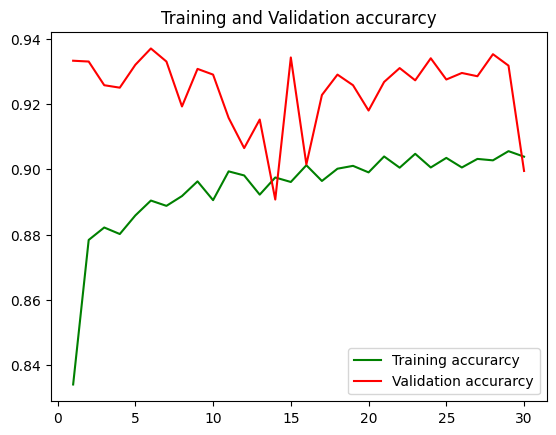

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'g', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.figure()
plt.show()

In [ ]:
#!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 6.8 MB/s eta 0:00:00


In [ ]:
import visualkeras

# Visualize the model
visualkeras.layered_view(model, to_file='model_visualization.png').show()

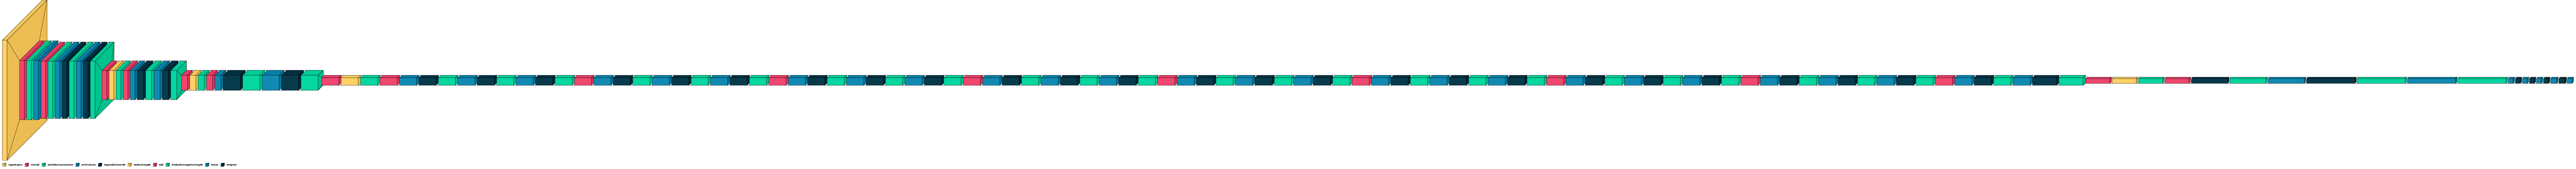

In [ ]:
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from collections import defaultdict

from PIL import ImageFont
font = ImageFont.load_default()
color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[ZeroPadding2D]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(model, color_map=color_map,legend=True, font=font)

In [ ]:
#test

In [ ]:
!mkdir dataset/test
!mv test/* dataset/test

mkdir: cannot create directory ‘dataset/test’: File exists
mv: cannot stat 'test/*': No such file or directory


In [ ]:
!ls dataset/test head -n 10

In [ ]:
test_dir = 'dataset/test'
test_imgs = ['dataset/test/{}'.format(i) for i in os.listdir(test_dir)]

In [ ]:
X_test, y_test = read_and_process_image(test_imgs[0:10]) #Y_test in this case will be empty.
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1./255)

1/1 [==============================] - 0s 23ms/step


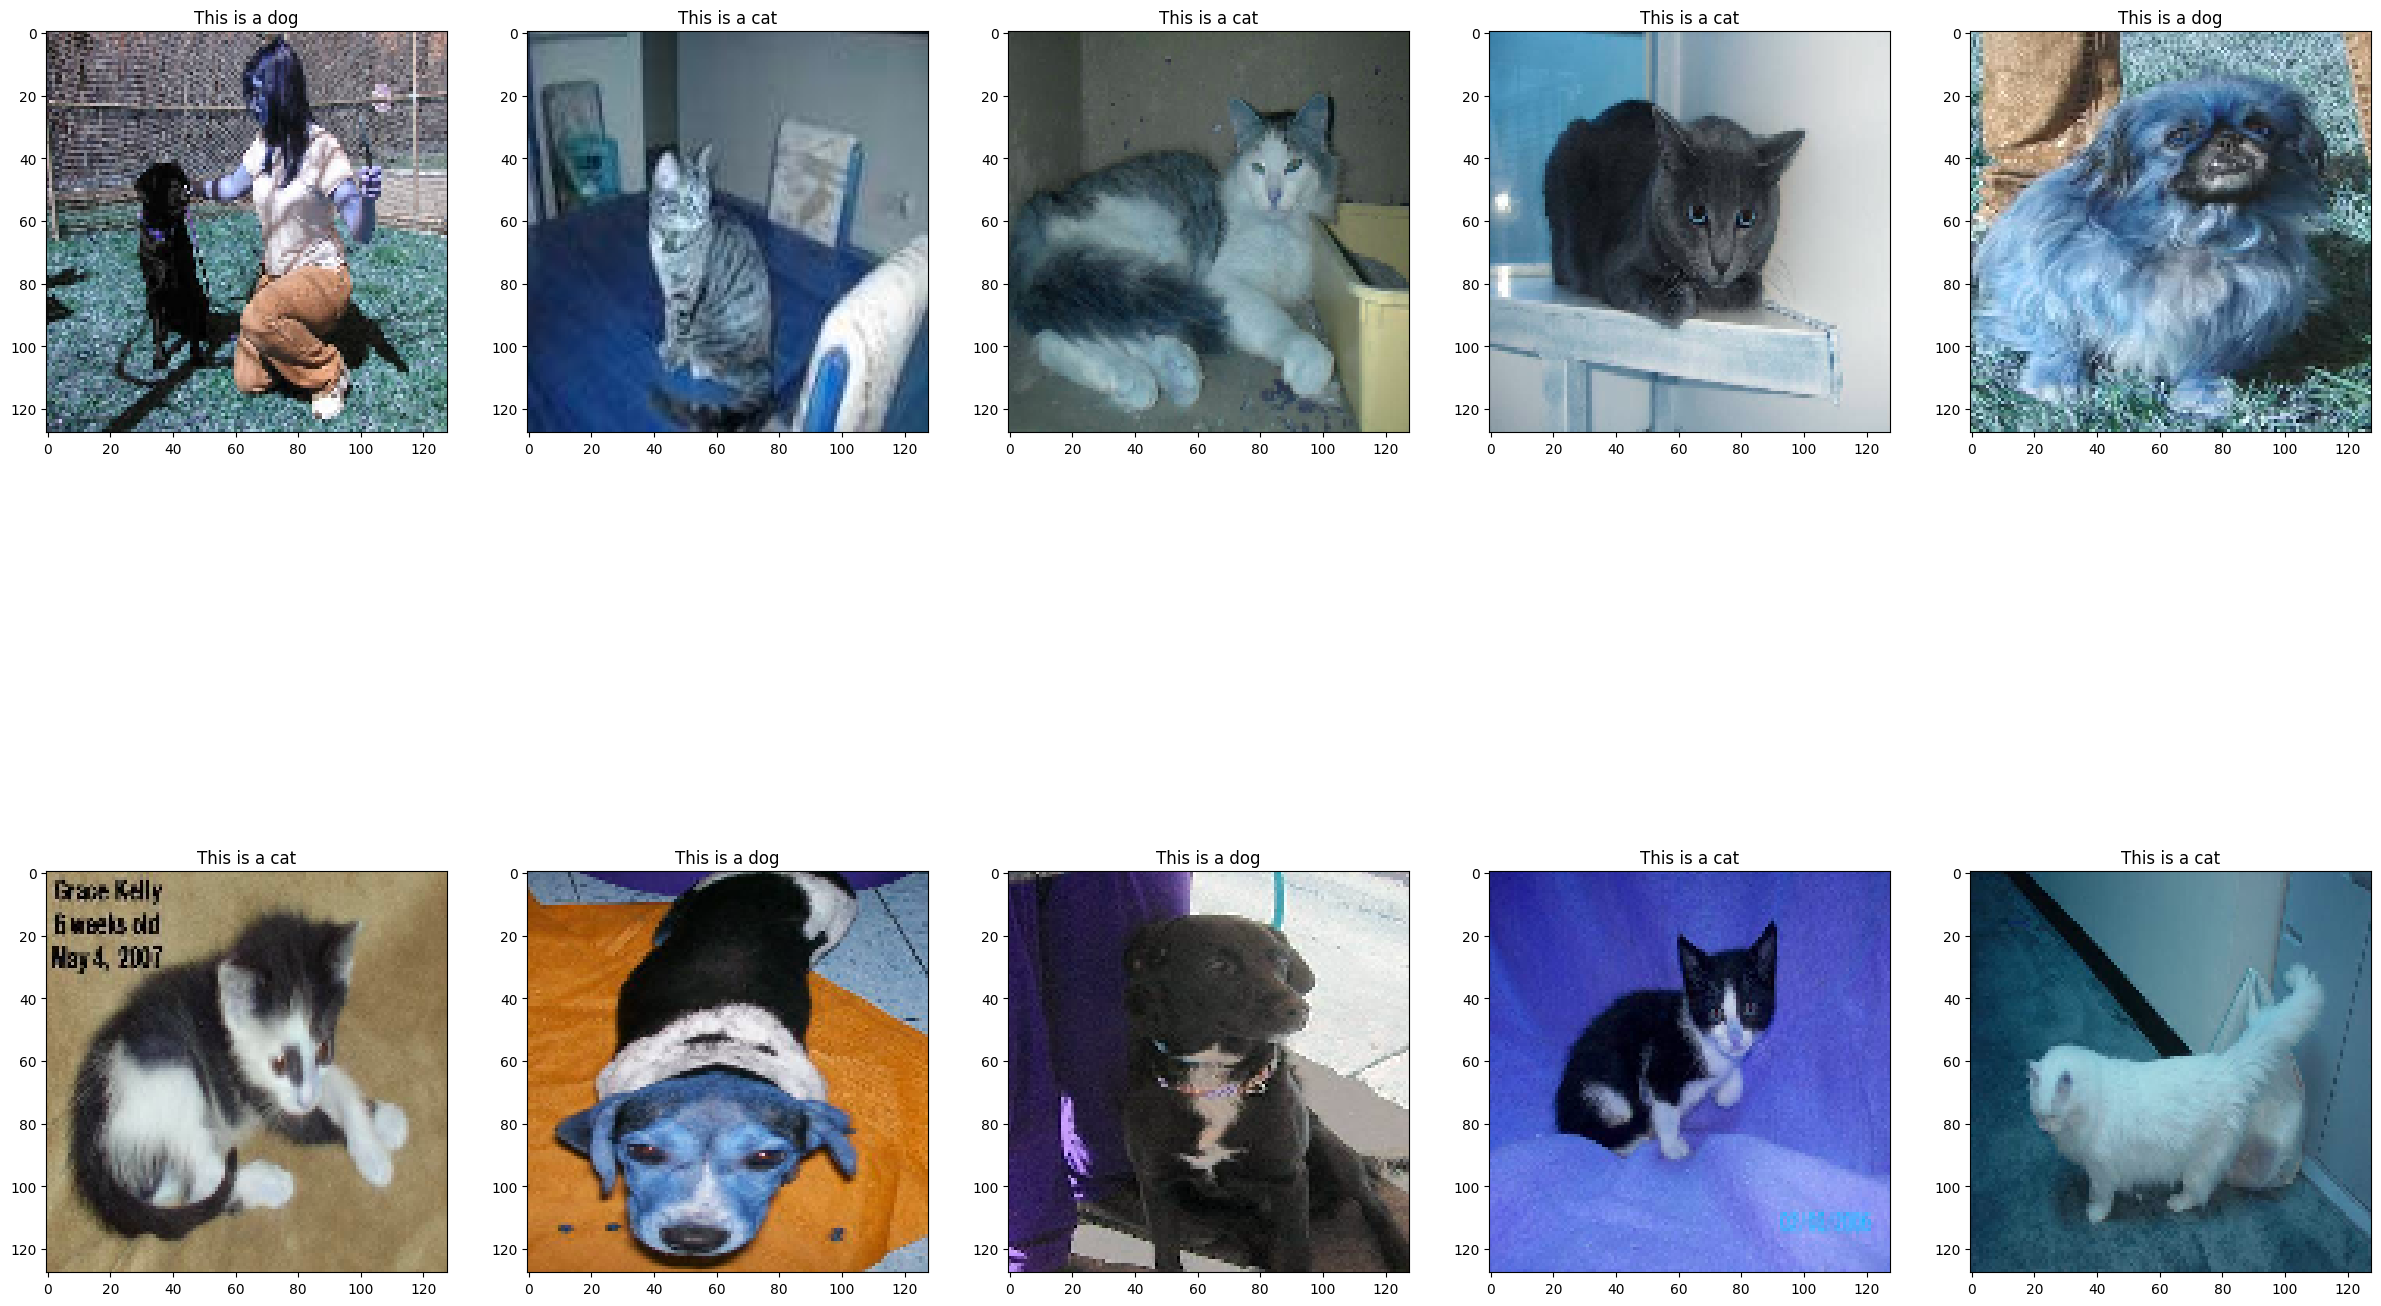

In [ ]:
i = 0
text_labels = []
plt.figure(figsize=(30,20))

columns = 5
for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('cat')
    else:
        text_labels.append('dog')
    plt.subplot(5 // columns + 1, columns, i + 1)
    plt.title('This is a ' + text_labels[i])
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 10 == 0:
        break
plt.show()

In [ ]:
X_test_output, y_test = read_and_process_image(test_imgs)

In [ ]:
#x = np.array(X_test_output)
#test_datagen = ImageDataGenerator(rescale=1./255)

i = 0
id = []
label = []

for batch in test_datagen.flow(x, batch_size=1):
    i+=1
    pred = model.predict(batch).item()
    label.append(pred)
    id.append(i)

    if i == len(X_test_output):
        break

In [ ]:
data = {'id': id, 'label': label}
result = pd.DataFrame(data)

result.head(5)

,id,label
0,1,0.287054
1,2,0.217154
2,3,0.153079
3,4,0.763498
4,5,0.434868


In [ ]:
result.to_csv('catsanddogs_1202_xception.csv', index=False)

In [ ]:
from google.colab import files
files.download('catsanddogs_1202_xception.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>